## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Machine Learning Aplicado II (Turma 02)</center>

<center>

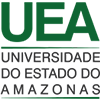

</center>

---
## <center>Atividade Final</center>
##### <center>Professor: Juan G. Colonna</center>
###### <center>Aluno: Heryck Michael</center>

##Informações do dataset

O dataset possui dados de mulheres grávidas e o intuito é classificar a saúde do bebê com intuito de prevenir a mortalidade infantil e materna.

O dataset possui 2126 linhas e 22 colunas e foi obtido através da plataforma Kaggle. 

Link do dataset: https://www.kaggle.com/andrewmvd/fetal-health-classification

Os dados podem ser classificados de três formas:

1.   Normal
2.   Suspeito
3.   Patológico

##Descrição das features

1.   **baseline value:** Frequência cardíaca fetal basal (FCF)
2.   **accelerations:** Número de acelerações por segundo
3.   **fetal_movement:** Número de movimentos fetais por segundo
4.   **uterine_contractions:** Número de contrações uterinas por segundo
5.   **light_decelerations:** Número de LDs por segundo
6.   **severe_decelerations:** Número de SDs por segundo
7.   **prolongued_decelerations:** Número de PDs por segundo
8.   **abnormal_short_term_variability:** Porcentagem de tempo com variabilidade anormal de curto prazo
9.   **mean_value_of_short_term_variability:** Valor médio da variabilidade de curto prazo
10.  **percentage_of_time_with_abnormal_long_term_variability:** Porcentagem de tempo com variabilidade anormal de longo prazo
11.  **mean_value_of_long_term_variability:** Valor médio da variabilidade de longo prazo
12.  **histogram_width:** Largura do histograma feito usando todos os valores de um registro
13.  **histogram_min:** Valor mínimo do histograma
14.  **histogram_max:** Valor máximo do histograma
15.  **histogram_number_of_peaks:** Número de picos no histograma do exame
16.  **histogram_number_of_zeroes:** Número de zeros no histograma do exame
17.  **histogram_mode:**Modo do histograma
18.  **histogram_mean:** Média histórica
19.  **histogram_median:** Mediana do Histograma
20.  **histogram_variance:** Variação histórica
21.  **histogram_tendency:** Tendência do histograma
22.  **fetal_health:** Saúde fetal (1 - Normal / 2 - Suspeito / 3 - Patológico)



##Bibliotecas

In [93]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

##Dataset

In [94]:
# Estabelecendo conexão com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
# Lendo o dataset e criando um dataframe

path_fetal_health = '/content/drive/MyDrive/ML Aplicado II - Projeto Final/dataset/fetal_health.csv'
df_fetal_health = pd.read_csv(path_fetal_health)

In [96]:
# Visualizando o dataset

df_fetal_health

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


**Verificando a existência de dados nulos**



In [97]:
df_fetal_health.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [98]:
df_fetal_health.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


**Quantidade de amostras / Balanceamento**

Foi decidido que não será feito nenhum tipo de balanceamento no dataset, os casos em que o bebê está normal é maior do que aqueles casos em que ele apresenta algum tipo de suspeita ou patologia. Então será preservado o "desbalanceamento" do dataset.

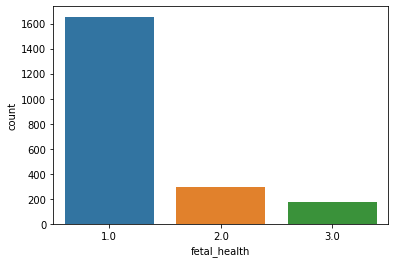

In [99]:
# Plotando a quantidade de amostras de cada tipo de saúde do bebê

sns.countplot(df_fetal_health['fetal_health'])

##Correlação

In [100]:
# Calculando a correlação entre as variáveis usando método de pearson

df_correlacao = df_fetal_health.corr(method='pearson')
df_correlacao

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


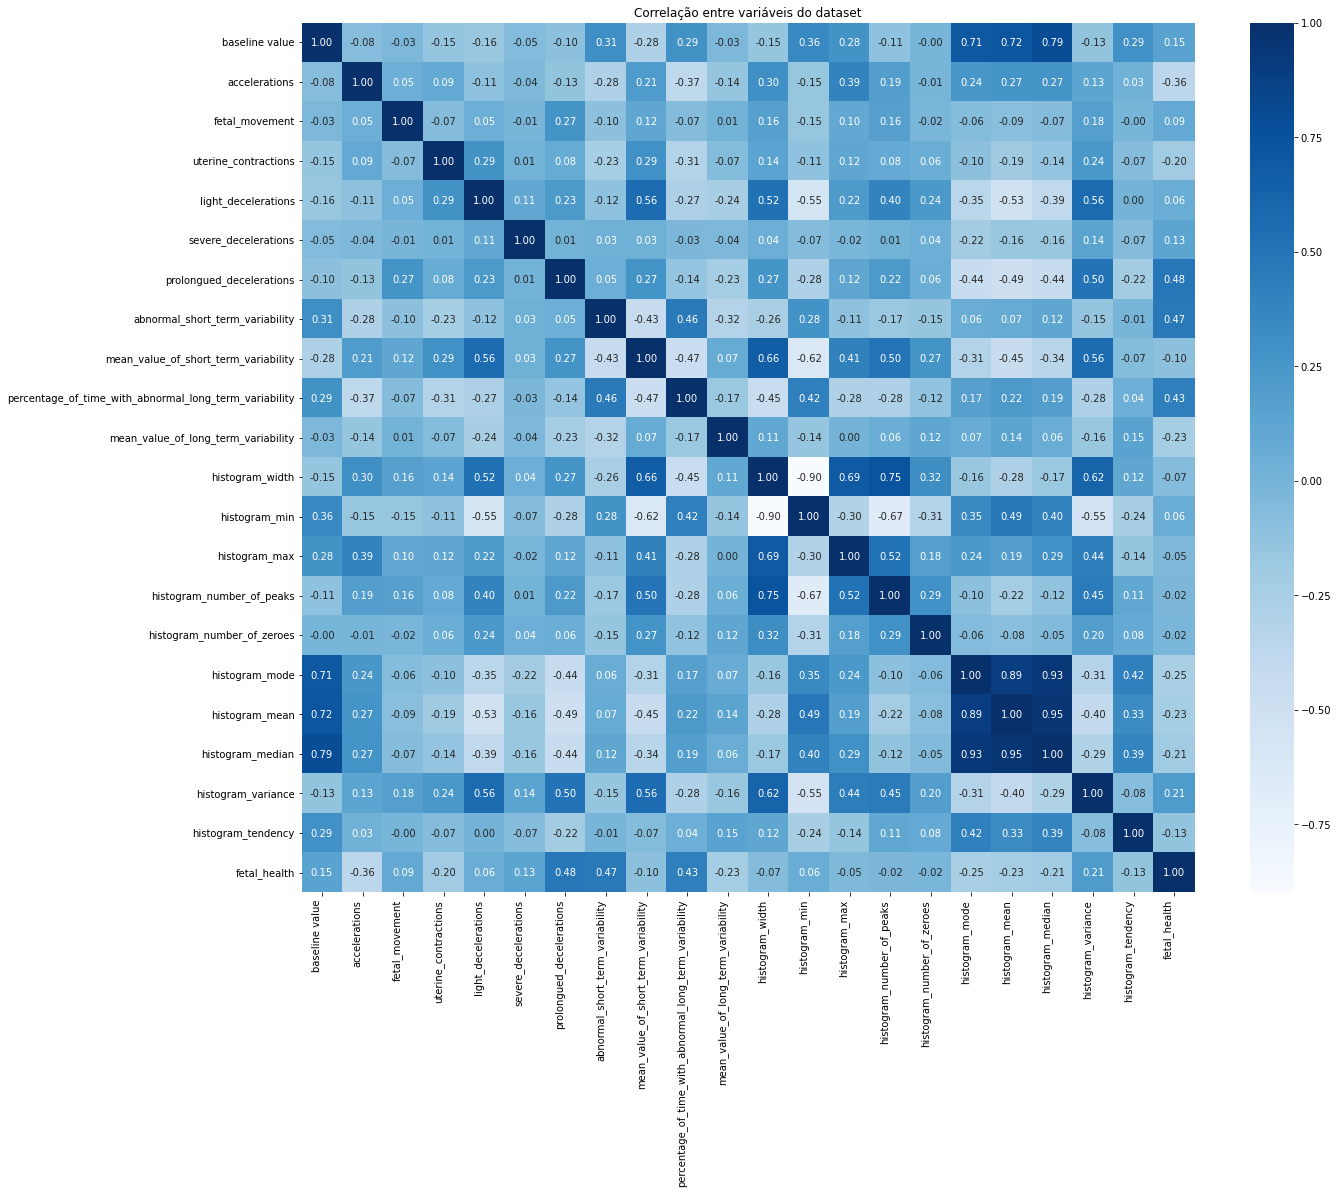

In [101]:
# Plotando a correlação de maneira que fica melhor visualmente

plt.figure(figsize=(20, 16))
sns.heatmap(df_correlacao, annot = True, fmt = '.2f', cmap='Blues')
plt.xticks(rotation=90, ha='right')
plt.title('Correlação entre variáveis do dataset')
plt.show()

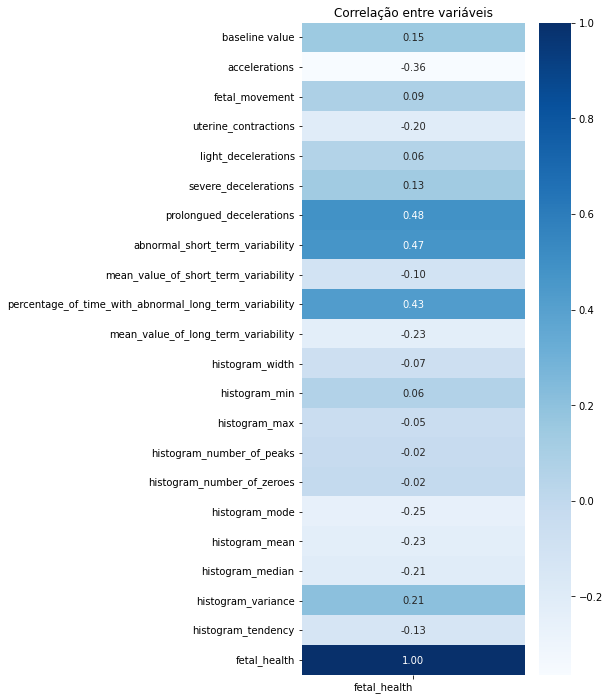

In [102]:
plt.figure(figsize=(5, 12))
sns.heatmap(df_fetal_health.corr().iloc[:,-1:], annot = True, fmt = '.2f', cmap='Blues')
plt.xticks(rotation=0, ha='right')
plt.title('Correlação entre variáveis')
plt.show()

##Normalização

O dataset precisa ser normalizado devido as variáveis estarem em ordem de grandeza completamente diferentes, como por exemplo a variável **baseline value** que varia entre 106 e 160 enquanto que a variável **accelerations** varia entre 0 e 0,019.

Então o próximo passo é decidir qual normalização usar, minmaxscaler ou standardscaler.

O minmaxscaler vai fazer com que todas as variáveis variem entre 0 e 1 enquanto que o standardscaler vai deixar todas as features com a mesma variância.

O standardscaler tende a ter um melhor desempenho em modelos probabilísticos portanto ele será usado como padrão em todos os modelos.

In [103]:
# Visualizando o dataset antes da normalização e removendo a variável target

df_fetal_health_features = df_fetal_health.drop(columns='fetal_health')
df_fetal_health_features

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


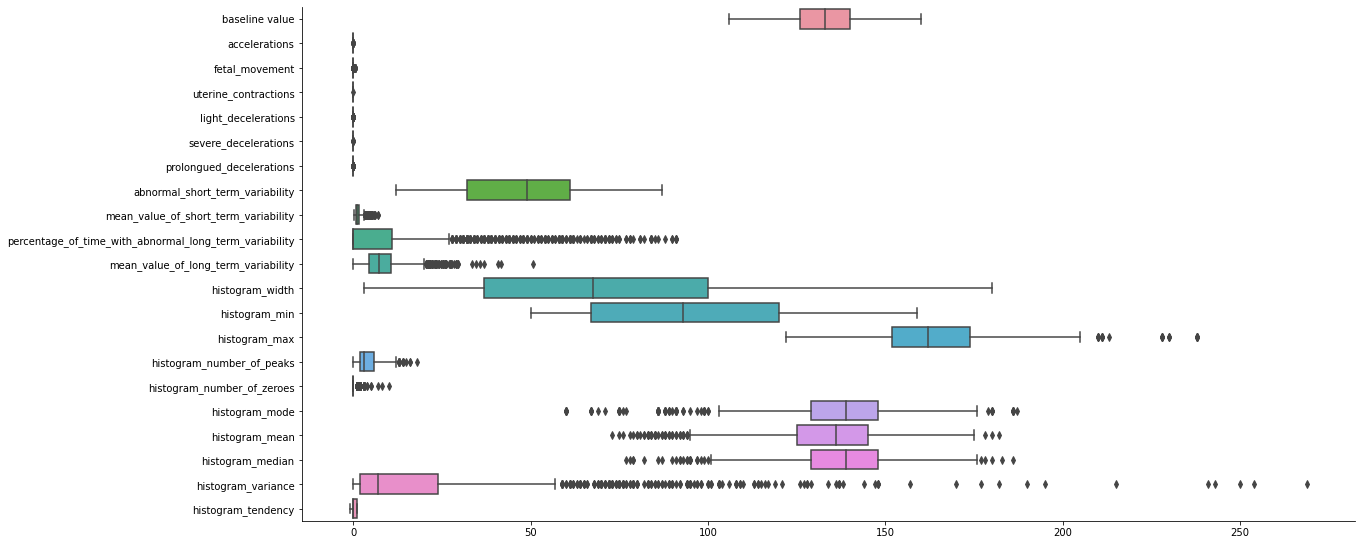

In [104]:
# Plotando boxplot do dataset para visualizar o dataset antes da normalização

g = sns.catplot(data=df_fetal_health_features, kind="box", orient='h');
g.fig.set_size_inches(120,8)

In [105]:
# Treina o algoritmo e cria o obj_norm

obj_norm = StandardScaler().fit(df_fetal_health_features)

In [106]:
# Aplica o normalizador

norm_df = obj_norm.transform(df_fetal_health_features)

In [107]:
# Transforma o numpy array para um dataframe

norm_df = pd.DataFrame(norm_df, columns=['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency'])

In [108]:
#Visualizando dataset normalizado

norm_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.822388,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.282833,0.823885,-0.175519,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173,-0.524526
2122,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.660775,-0.193290,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656,1.112980
2123,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.056341,0.552035,-0.371007,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138,1.112980
2124,0.680604,-0.563635,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.932624,-0.211062,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138,1.112980


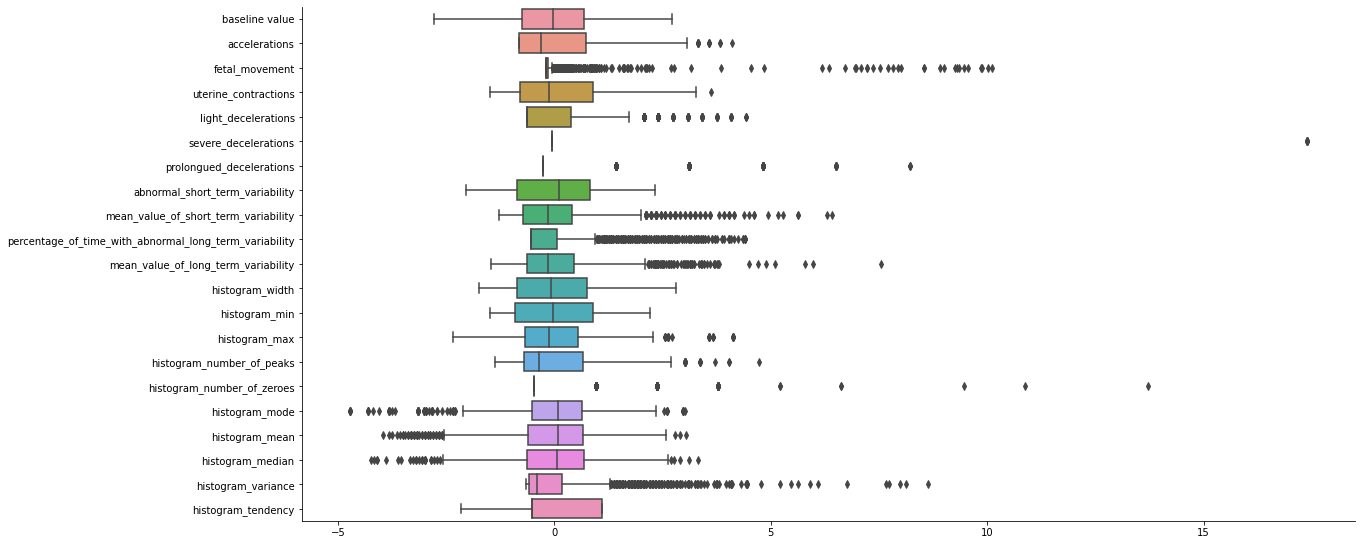

In [109]:
#Visualizando o boxplot do dataset após a normalização

g = sns.catplot(data=norm_df, kind="box", orient='h');
g.fig.set_size_inches(120,8)

##Outliers

Após aplicar um método de remoção de outliers o número de linhas do dataset foi drásticamente reduzido de 2126 linhas para apenas 925 linhas o que provavelmente iria dificultar o aprendizado dos modelos de classificação pelo reduzido número de amostras, então optou-se por não dar continuidade com o dataset sem outliers.

In [110]:
# Removendo outliers

# Definindo uma função chamada "outliers" que retornará a lista do index dos outliers
# IQR = Q3 - Q1
# +/- 1.5*IQR
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)  ]
  return ls

In [111]:
#Criando uma lista vazia para armazenar a saída dos indices de múltiplas colunas

index_list = []
for feature in ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']:
  index_list.extend(outliers(norm_df, feature))

In [112]:
# define uma função chamada "remove" que retorna um dataframe livre de outliers

def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [113]:
#Executa a função remove no dataframe normalizado e imprime o novo dataset sem outliers

df_cleaned = remove(norm_df, index_list)
df_cleaned

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
7,-1.148938,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,2.094965,-0.943095,-0.209142,1.317304,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
8,-1.148938,-0.822388,-0.20321,-0.803434,-0.638438,-0.057476,-0.268754,2.153143,-0.943095,-0.263512,0.961870,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
9,-1.148938,-0.822388,-0.20321,-0.463919,-0.638438,-0.057476,-0.268754,2.269498,-1.169587,-0.209142,0.428719,-0.062802,-1.068562,-1.896626,-1.040530,-0.458444,-0.943495,-0.808890,-1.043360,-0.614691,1.112980
23,-0.539090,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.920433,-0.943095,-0.535361,-0.246605,-1.397966,0.690973,-1.896626,-1.379664,-0.458444,-0.699256,-0.680602,-0.905078,-0.614691,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,0.680604,-0.822388,-0.20321,0.215111,-0.300544,-0.057476,-0.268754,1.745900,-0.716603,0.388926,-0.388779,-1.012822,1.029345,-0.503089,-0.701397,-0.458444,0.460877,0.538134,0.477743,-0.580173,-0.524526
2121,0.680604,-0.822388,-0.20321,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.282833,0.823885,-0.175519,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173,-0.524526
2122,0.680604,-0.563635,-0.20321,0.894142,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.660775,-0.193290,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656,1.112980
2123,0.680604,-0.563635,-0.20321,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.056341,0.552035,-0.371007,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138,1.112980


##Seleção de Features

In [114]:
df_fetal_health_target = df_fetal_health['fetal_health']
df_fetal_health_target

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

**F_Classif**

Poucas dimensões 

In [115]:
f_classif_few_dimensions = SelectKBest(score_func=f_classif, k=5)

In [116]:
x_f_classif_few_dimensions = norm_df
y_f_classif_few_dimensions = df_fetal_health_target

In [117]:
fit_f_classif_few_dimensions = f_classif_few_dimensions.fit(x_f_classif_few_dimensions, y_f_classif_few_dimensions)

In [118]:
features_f_classif_few_dimensions = fit_f_classif_few_dimensions.transform(x_f_classif_few_dimensions)

In [119]:
print(features_f_classif_few_dimensions)

[[-0.2687543   1.51319018  1.80254152 -1.06561383  0.15326971]
 [-0.2687543  -1.74475094 -0.53536128  0.21663815  0.08912573]
 [-0.2687543  -1.80292846 -0.53536128  0.21663815  0.02498176]
 ...
 [-0.2687543   1.8622553   0.55203537  0.94935356  0.85885344]
 [-0.2687543   1.80407778  0.9326242   0.88829395  0.79470947]
 [-0.2687543   1.5713677   1.42195269  0.46087662  0.53813356]]


In [120]:
cols_f_classif_few_features = fit_f_classif_few_dimensions.get_support(indices=True)
norm_df.iloc[:,cols_f_classif_few_features]

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_mode,histogram_mean
0,-0.268754,1.513190,1.802542,-1.065614,0.153270
1,-0.268754,-1.744751,-0.535361,0.216638,0.089126
2,-0.268754,-1.802928,-0.535361,0.216638,0.024982
3,-0.268754,-1.802928,-0.535361,-0.027600,-0.039162
4,-0.268754,-1.802928,-0.535361,-0.027600,0.089126
...,...,...,...,...,...
2121,-0.268754,1.862255,0.823885,0.949354,0.987141
2122,-0.268754,1.804078,0.660775,0.888294,0.858853
2123,-0.268754,1.862255,0.552035,0.949354,0.858853
2124,-0.268754,1.804078,0.932624,0.888294,0.794709


In [121]:
X_f_classif_few_dimensions_model = norm_df.values
y_f_classif_few_dimensions_model = df_fetal_health_target.values

X_train_f_classif_few_dimensions, X_test_f_classif_few_dimensions, y_train_f_classif_few_dimensions, y_test_f_classif_few_dimensions = train_test_split(X_f_classif_few_dimensions_model, y_f_classif_few_dimensions_model, test_size=0.3, stratify=y_f_classif_few_dimensions_model)

print('Shape of X_train:', X_train_f_classif_few_dimensions.shape)
print('Shape of X_test:', X_test_f_classif_few_dimensions.shape)
print('Shape of y_train:', y_train_f_classif_few_dimensions.shape)
print('Shape of y_test:', y_test_f_classif_few_dimensions.shape)

Shape of X_train: (1488, 21)
Shape of X_test: (638, 21)
Shape of y_train: (1488,)
Shape of y_test: (638,)


Muitas dimensões

In [122]:
f_classif_many_dimensions = SelectKBest(score_func=f_classif, k=14)

In [123]:
x_f_classif_many_dimensions = norm_df
y_f_classif_many_dimensions = df_fetal_health_target

In [124]:
fit_f_classif_many_dimensions = f_classif_many_dimensions.fit(x_f_classif_many_dimensions, y_f_classif_many_dimensions)

In [125]:
features_f_classif_many_dimensions = fit_f_classif_many_dimensions.transform(x_f_classif_many_dimensions)

In [126]:
print(features_f_classif_many_dimensions)

[[-1.35222005 -0.8223883  -1.48246456 ...  0.15326971 -1.18164215
   1.87056871]
 [-0.1325256   0.73013282  0.55462667 ...  0.08912573  0.13203796
  -0.23499819]
 [-0.03088439 -0.04612774  1.23365708 ...  0.02498176 -0.00624416
  -0.2004807 ]
 ...
 [ 0.68060404 -0.56363478  0.89414188 ...  0.85885344  0.96173066
  -0.51113811]
 [ 0.68060404 -0.56363478  0.55462667 ...  0.79470947  0.8925896
  -0.51113811]
 [ 0.88388645 -0.30488126  1.23365708 ...  0.53813356  0.47774325
  -0.61469058]]


In [127]:
cols_f_classif_many_features = fit_f_classif_many_dimensions.get_support(indices=True)
norm_df.iloc[:,cols_f_classif_many_features]

,baseline value,accelerations,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,-1.352220,-0.822388,-1.482465,-0.638438,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-1.068562,-1.065614,0.153270,-1.181642,1.870569
1,-0.132526,0.730133,0.554627,0.375243,-0.268754,-1.744751,0.868841,-0.535361,0.393176,-0.865539,0.216638,0.089126,0.132038,-0.234998
2,-0.030884,-0.046128,1.233657,0.375243,-0.268754,-1.802928,0.868841,-0.535361,0.926327,-0.865539,0.216638,0.024982,-0.006244,-0.200481
3,0.070757,-0.046128,1.233657,0.375243,-0.268754,-1.802928,1.208579,-0.535361,2.632411,-1.373097,-0.027600,-0.039162,-0.075385,-0.200481
4,-0.132526,0.988886,1.233657,-0.638438,-0.268754,-1.802928,1.208579,-0.535361,2.081488,-1.373097,-0.027600,0.089126,-0.006244,-0.269516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.822388,0.894142,-0.638438,-0.268754,1.862255,-1.282833,0.823885,-0.175519,1.469229,0.949354,0.987141,0.961731,-0.580173
2122,0.680604,-0.563635,0.894142,-0.638438,-0.268754,1.804078,-1.056341,0.660775,-0.193290,0.318764,0.888294,0.858853,0.892590,-0.545656
2123,0.680604,-0.563635,0.894142,-0.638438,-0.268754,1.862255,-1.056341,0.552035,-0.371007,0.318764,0.949354,0.858853,0.961731,-0.511138
2124,0.680604,-0.563635,0.554627,-0.638438,-0.268754,1.804078,-1.056341,0.932624,-0.211062,0.318764,0.888294,0.794709,0.892590,-0.511138


In [128]:
X_f_classif_many_dimensions_model = norm_df.values
y_f_classif_many_dimensions_model = df_fetal_health_target.values

X_train_f_classif_many_dimensions, X_test_f_classif_many_dimensions, y_train_f_classif_many_dimensions, y_test_f_classif_many_dimensions = train_test_split(X_f_classif_many_dimensions_model, y_f_classif_many_dimensions_model, test_size=0.3, stratify=y_f_classif_many_dimensions_model)

print('Shape of X_train:', X_train_f_classif_many_dimensions.shape)
print('Shape of X_test:', X_test_f_classif_many_dimensions.shape)
print('Shape of y_train:', y_train_f_classif_many_dimensions.shape)
print('Shape of y_test:', y_test_f_classif_many_dimensions.shape)

Shape of X_train: (1488, 21)
Shape of X_test: (638, 21)
Shape of y_train: (1488,)
Shape of y_test: (638,)


**PCA**

In [129]:
# Subtrair pelo .mean(axis=0) para centralizar os dados

X_PCA = norm_df.values - np.mean(norm_df.values)
y_PCA = df_fetal_health_target.values

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA,
                                                    y_PCA,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y_PCA)

pca = PCA(n_components=14)
pca.fit(X_train_PCA)
X_train_pca_model = pca.transform(X_train_PCA)
X_test_pca_model = pca.transform(X_test_PCA)

print(sum(pca.explained_variance_ratio_))

print('Shape of X_train:', X_train_PCA.shape)
print('Shape of X_test:', X_test_PCA.shape)
print('Shape of y_train:', y_train_PCA.shape)
print('Shape of y_test:', y_test_PCA.shape)

0.9635404941962411
Shape of X_train: (1488, 21)
Shape of X_test: (638, 21)
Shape of y_train: (1488,)
Shape of y_test: (638,)


**RFE**

Poucas dimensões

In [130]:
model_RFE_few_dimensions = LogisticRegression(max_iter=2000)

In [131]:
rfe_few_dimensions = RFE(model_RFE_few_dimensions, n_features_to_select=5, step=1)

In [132]:
X_RFE_few_dimensions = norm_df
y_RFE_few_dimensions = df_fetal_health_target

fit_RFE_few_features = rfe_few_dimensions.fit(X_RFE_few_dimensions, y_RFE_few_dimensions)

print ("Número de Features: {}".format(fit_RFE_few_features.n_features_))

Número de Features: 5


In [133]:
cols_RFE_few_features = fit_RFE_few_features.get_support(indices=True)
norm_df.iloc[:,cols_RFE_few_features]

,accelerations,prolongued_decelerations,abnormal_short_term_variability,histogram_mode,histogram_mean
0,-0.822388,-0.268754,1.513190,-1.065614,0.153270
1,0.730133,-0.268754,-1.744751,0.216638,0.089126
2,-0.046128,-0.268754,-1.802928,0.216638,0.024982
3,-0.046128,-0.268754,-1.802928,-0.027600,-0.039162
4,0.988886,-0.268754,-1.802928,-0.027600,0.089126
...,...,...,...,...,...
2121,-0.822388,-0.268754,1.862255,0.949354,0.987141
2122,-0.563635,-0.268754,1.804078,0.888294,0.858853
2123,-0.563635,-0.268754,1.862255,0.949354,0.858853
2124,-0.563635,-0.268754,1.804078,0.888294,0.794709


In [134]:
X_RFE_few_dimensions_model = norm_df.values
y_RFE_few_dimensions_model = df_fetal_health_target.values

X_train_RFE_few_dimensions, X_test_RFE_few_dimensions, y_train_RFE_few_dimensions, y_test_RFE_few_dimensions = train_test_split(X_RFE_few_dimensions_model, y_RFE_few_dimensions_model, test_size=0.3, stratify=y_RFE_few_dimensions_model)

print('Shape of X_train:', X_train_RFE_few_dimensions.shape)
print('Shape of X_test:', X_test_RFE_few_dimensions.shape)
print('Shape of y_train:', y_train_RFE_few_dimensions.shape)
print('Shape of y_test:', y_test_RFE_few_dimensions.shape)

Shape of X_train: (1488, 21)
Shape of X_test: (638, 21)
Shape of y_train: (1488,)
Shape of y_test: (638,)


Muitas dimensões

In [135]:
model_RFE_many_dimensions = LogisticRegression(max_iter=2000)

In [136]:
rfe_many_dimensions = RFE (model_RFE_many_dimensions, n_features_to_select=14, step=1)

In [137]:
X_RFE_many_dimensions = norm_df
y_RFE_many_dimensions = df_fetal_health_target

fit_RFE_many_features = rfe_many_dimensions.fit(X_RFE_many_dimensions, y_RFE_many_dimensions)

print ("Número de Features: {}".format(fit_RFE_many_features.n_features_))

Número de Features: 14


In [138]:
cols_RFE_many_features = fit_RFE_many_features.get_support(indices=True)
norm_df.iloc[:,cols_RFE_many_features]

,baseline value,accelerations,fetal_movement,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.268754,1.513190,-0.943095,1.802542,-2.119592,-0.701397,-1.065614,0.153270,-1.181642,1.870569
1,-0.132526,0.730133,-0.203210,0.554627,-0.268754,-1.744751,0.868841,-0.535361,1.893794,0.655137,0.216638,0.089126,0.132038,-0.234998
2,-0.030884,-0.046128,-0.203210,1.233657,-0.268754,-1.802928,0.868841,-0.535361,1.893794,0.316003,0.216638,0.024982,-0.006244,-0.200481
3,0.070757,-0.046128,-0.203210,1.233657,-0.268754,-1.802928,1.208579,-0.535361,0.333033,2.350804,-0.027600,-0.039162,-0.075385,-0.200481
4,-0.132526,0.988886,-0.203210,1.233657,-0.268754,-1.802928,1.208579,-0.535361,0.333033,1.672537,-0.027600,0.089126,-0.006244,-0.269516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.822388,-0.203210,0.894142,-0.268754,1.862255,-1.282833,0.823885,0.723223,-0.023130,0.949354,0.987141,0.961731,-0.580173
2122,0.680604,-0.563635,-0.203210,0.894142,-0.268754,1.804078,-1.056341,0.660775,0.277292,0.655137,0.888294,0.858853,0.892590,-0.545656
2123,0.680604,-0.563635,-0.203210,0.894142,-0.268754,1.862255,-1.056341,0.552035,0.333033,0.316003,0.949354,0.858853,0.961731,-0.511138
2124,0.680604,-0.563635,-0.203210,0.554627,-0.268754,1.804078,-1.056341,0.932624,0.277292,0.655137,0.888294,0.794709,0.892590,-0.511138


In [139]:
X_RFE_many_dimensions_model = norm_df.values
y_RFE_many_dimensions_model = df_fetal_health_target.values

X_train_RFE_many_dimensions, X_test_RFE_many_dimensions, y_train_RFE_many_dimensions, y_test_RFE_many_dimensions = train_test_split(X_RFE_many_dimensions_model, y_RFE_many_dimensions_model, test_size=0.3, stratify=y_RFE_many_dimensions_model)

print('Shape of X_train:', X_train_RFE_many_dimensions.shape)
print('Shape of X_test:', X_test_RFE_many_dimensions.shape)
print('Shape of y_train:', y_train_RFE_many_dimensions.shape)
print('Shape of y_test:', y_test_RFE_many_dimensions.shape)

Shape of X_train: (1488, 21)
Shape of X_test: (638, 21)
Shape of y_train: (1488,)
Shape of y_test: (638,)


##Modelos de Classificação

**Gaussian NB**

Sem seleção de Features

              precision    recall  f1-score   support

         1.0       1.00      0.76      0.87       497
         2.0       0.41      0.92      0.56        88
         3.0       0.56      0.62      0.59        53

    accuracy                           0.77       638
   macro avg       0.65      0.77      0.67       638
weighted avg       0.88      0.77      0.80       638



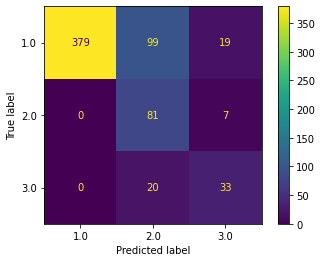

In [140]:
X_gaussian_NB_sem_selecao = norm_df.values
y_gaussian_NB_sem_selecao = df_fetal_health['fetal_health'].values

X_train_gaussian_NB_sem_selecao, X_test_gaussian_NB_sem_selecao, y_train_gaussian_NB_sem_selecao, y_test_gaussian_NB_sem_selecao = train_test_split(X_gaussian_NB_sem_selecao, y_gaussian_NB_sem_selecao, test_size=0.3, stratify=y_gaussian_NB_sem_selecao)

model_gaussian_NB_sem_selecao = OneVsRestClassifier(GaussianNB())
model_gaussian_NB_sem_selecao.fit(X_train_gaussian_NB_sem_selecao, y_train_gaussian_NB_sem_selecao)

y_pred_gaussian_NB_sem_selecao = model_gaussian_NB_sem_selecao.predict(X_test_gaussian_NB_sem_selecao)

print(classification_report(y_test_gaussian_NB_sem_selecao, y_pred_gaussian_NB_sem_selecao))
plot_confusion_matrix(model_gaussian_NB_sem_selecao, X_test_gaussian_NB_sem_selecao, y_test_gaussian_NB_sem_selecao)

F_Classif com poucas dimensões

              precision    recall  f1-score   support

         1.0       1.00      0.79      0.88       497
         2.0       0.43      0.94      0.59        88
         3.0       0.64      0.60      0.62        53

    accuracy                           0.80       638
   macro avg       0.69      0.78      0.70       638
weighted avg       0.89      0.80      0.82       638



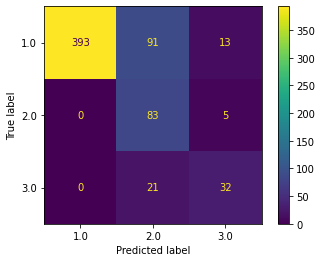

In [141]:
model_gaussian_NB_f_classif_few_dimensions = OneVsRestClassifier(GaussianNB())
model_gaussian_NB_f_classif_few_dimensions.fit(X_train_f_classif_few_dimensions, y_train_f_classif_few_dimensions)

y_pred_gaussian_NB_f_classif_few_dimensions = model_gaussian_NB_f_classif_few_dimensions.predict(X_test_f_classif_few_dimensions)

print(classification_report(y_test_f_classif_few_dimensions, y_pred_gaussian_NB_f_classif_few_dimensions))
plot_confusion_matrix(model_gaussian_NB_f_classif_few_dimensions, X_test_f_classif_few_dimensions, y_test_f_classif_few_dimensions)

F_Classif com muitas dimensões

              precision    recall  f1-score   support

         1.0       1.00      0.80      0.89       497
         2.0       0.44      0.94      0.60        88
         3.0       0.58      0.58      0.58        53

    accuracy                           0.80       638
   macro avg       0.68      0.78      0.69       638
weighted avg       0.89      0.80      0.82       638



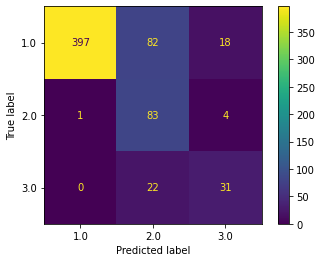

In [142]:
model_gaussian_NB_f_classif_many_dimensions = OneVsRestClassifier(GaussianNB())
model_gaussian_NB_f_classif_many_dimensions.fit(X_train_f_classif_many_dimensions, y_train_f_classif_many_dimensions)

y_pred_gaussian_NB_f_classif_many_dimensions = model_gaussian_NB_f_classif_many_dimensions.predict(X_test_f_classif_many_dimensions)

print(classification_report(y_test_f_classif_many_dimensions, y_pred_gaussian_NB_f_classif_many_dimensions))
plot_confusion_matrix(model_gaussian_NB_f_classif_many_dimensions, X_test_f_classif_many_dimensions, y_test_f_classif_many_dimensions)

PCA

              precision    recall  f1-score   support

         1.0       0.99      0.78      0.87       497
         2.0       0.41      0.92      0.57        88
         3.0       0.66      0.62      0.64        53

    accuracy                           0.79       638
   macro avg       0.69      0.77      0.69       638
weighted avg       0.88      0.79      0.81       638



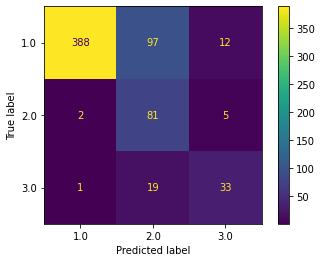

In [143]:
model_gaussian_NB_PCA = OneVsRestClassifier(GaussianNB())
model_gaussian_NB_PCA.fit(X_train_PCA, y_train_PCA)

y_pred_gaussian_NB_PCA = model_gaussian_NB_PCA.predict(X_test_PCA)

print(classification_report(y_test_PCA, y_pred_gaussian_NB_PCA))
plot_confusion_matrix(model_gaussian_NB_PCA, X_test_PCA, y_test_PCA)

RFE com poucas dimensões

              precision    recall  f1-score   support

         1.0       0.99      0.78      0.87       497
         2.0       0.42      0.94      0.58        88
         3.0       0.58      0.58      0.58        53

    accuracy                           0.79       638
   macro avg       0.67      0.77      0.68       638
weighted avg       0.88      0.79      0.81       638



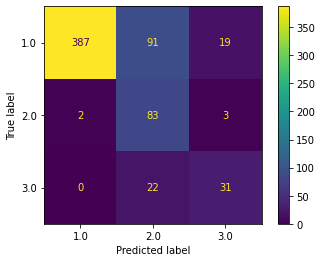

In [144]:
model_gaussian_NB_RFE_few_dimensions = OneVsRestClassifier(GaussianNB())
model_gaussian_NB_RFE_few_dimensions.fit(X_train_RFE_few_dimensions, y_train_RFE_few_dimensions)

y_pred_gaussian_NB_RFE_few_dimensions = model_gaussian_NB_RFE_few_dimensions.predict(X_test_RFE_few_dimensions)

print(classification_report(y_test_RFE_few_dimensions, y_pred_gaussian_NB_RFE_few_dimensions))
plot_confusion_matrix(model_gaussian_NB_RFE_few_dimensions, X_test_RFE_few_dimensions, y_test_RFE_few_dimensions)

RFE com muitas dimensões

              precision    recall  f1-score   support

         1.0       1.00      0.79      0.88       497
         2.0       0.44      0.97      0.60        88
         3.0       0.69      0.66      0.67        53

    accuracy                           0.80       638
   macro avg       0.71      0.80      0.72       638
weighted avg       0.89      0.80      0.82       638



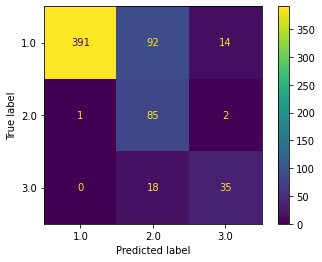

In [145]:
model_gaussian_NB_RFE_many_dimensions = OneVsRestClassifier(GaussianNB())
model_gaussian_NB_RFE_many_dimensions.fit(X_train_RFE_many_dimensions, y_train_RFE_many_dimensions)

y_pred_gaussian_NB_RFE_many_dimensions = model_gaussian_NB_RFE_many_dimensions.predict(X_test_RFE_many_dimensions)

print(classification_report(y_test_RFE_many_dimensions, y_pred_gaussian_NB_RFE_many_dimensions))
plot_confusion_matrix(model_gaussian_NB_RFE_many_dimensions, X_test_RFE_many_dimensions, y_test_RFE_many_dimensions)

**Regressão Logística**

Sem seleção de Features

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       497
         2.0       0.75      0.70      0.73        88
         3.0       0.89      0.74      0.80        53

    accuracy                           0.91       638
   macro avg       0.86      0.80      0.83       638
weighted avg       0.91      0.91      0.91       638



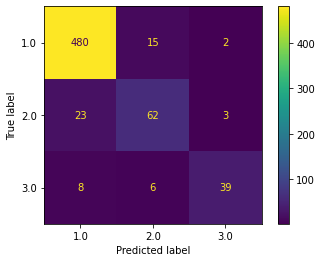

In [146]:
X_LogisticRegression_sem_selecao = norm_df.values
y_LogisticRegression_sem_selecao = df_fetal_health['fetal_health'].values

X_train_LogisticRegression_sem_selecao, X_test_LogisticRegression_sem_selecao, y_train_LogisticRegression_sem_selecao, y_test_LogisticRegression_sem_selecao = train_test_split(X_LogisticRegression_sem_selecao, y_LogisticRegression_sem_selecao, test_size=0.3, stratify=y_LogisticRegression_sem_selecao)

model_LogisticRegression_sem_selecao = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg'))
model_LogisticRegression_sem_selecao.fit(X_train_LogisticRegression_sem_selecao, y_train_LogisticRegression_sem_selecao)

y_pred_LogisticRegression_sem_selecao = model_LogisticRegression_sem_selecao.predict(X_test_LogisticRegression_sem_selecao)

print(classification_report(y_test_LogisticRegression_sem_selecao, y_pred_LogisticRegression_sem_selecao))
plot_confusion_matrix(model_LogisticRegression_sem_selecao, X_test_LogisticRegression_sem_selecao, y_test_LogisticRegression_sem_selecao)

F_classif com poucas dimensões

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       497
         2.0       0.70      0.73      0.71        88
         3.0       0.88      0.72      0.79        53

    accuracy                           0.91       638
   macro avg       0.84      0.80      0.82       638
weighted avg       0.91      0.91      0.91       638



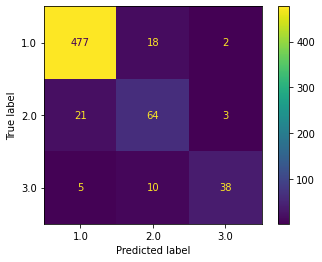

In [147]:
model_LogisticRegression_f_classif_few_dimensions = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg'))
model_LogisticRegression_f_classif_few_dimensions.fit(X_train_f_classif_few_dimensions, y_train_f_classif_few_dimensions)

y_pred_LogisticRegression_f_classif_few_dimensions = model_LogisticRegression_f_classif_few_dimensions.predict(X_test_f_classif_few_dimensions)

print(classification_report(y_test_f_classif_few_dimensions, y_pred_LogisticRegression_f_classif_few_dimensions))
plot_confusion_matrix(model_LogisticRegression_f_classif_few_dimensions, X_test_f_classif_few_dimensions, y_test_f_classif_few_dimensions)

F_classif com muitas dimensões

              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       497
         2.0       0.65      0.62      0.64        88
         3.0       0.92      0.66      0.77        53

    accuracy                           0.89       638
   macro avg       0.83      0.75      0.78       638
weighted avg       0.89      0.89      0.88       638



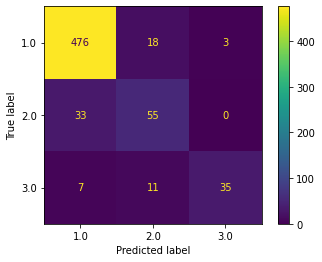

In [148]:
model_LogisticRegression_f_classif_many_dimensions = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg'))
model_LogisticRegression_f_classif_many_dimensions.fit(X_train_f_classif_many_dimensions, y_train_f_classif_many_dimensions)

y_pred_LogisticRegression_f_classif_many_dimensions = model_LogisticRegression_f_classif_many_dimensions.predict(X_test_f_classif_many_dimensions)

print(classification_report(y_test_f_classif_many_dimensions, y_pred_LogisticRegression_f_classif_many_dimensions))
plot_confusion_matrix(model_LogisticRegression_f_classif_many_dimensions, X_test_f_classif_many_dimensions, y_test_f_classif_many_dimensions)

PCA

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       497
         2.0       0.61      0.60      0.61        88
         3.0       0.82      0.77      0.80        53

    accuracy                           0.88       638
   macro avg       0.79      0.77      0.78       638
weighted avg       0.88      0.88      0.88       638



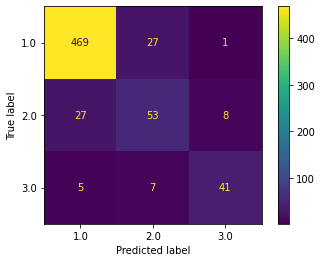

In [149]:
model_LogisticRegression_PCA = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg'))
model_LogisticRegression_PCA.fit(X_train_PCA, y_train_PCA)

y_pred_LogisticRegression_PCA = model_LogisticRegression_PCA.predict(X_test_PCA)

print(classification_report(y_test_PCA, y_pred_LogisticRegression_PCA))
plot_confusion_matrix(model_LogisticRegression_PCA, X_test_PCA, y_test_PCA)

RFE com poucas dimensões

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       497
         2.0       0.66      0.68      0.67        88
         3.0       0.93      0.72      0.81        53

    accuracy                           0.90       638
   macro avg       0.84      0.78      0.81       638
weighted avg       0.90      0.90      0.90       638



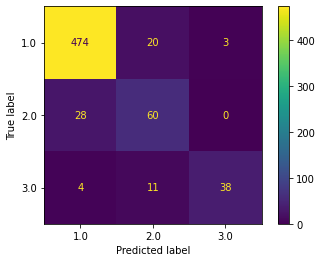

In [150]:
model_LogisticRegression_RFE_few_dimensions = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg'))
model_LogisticRegression_RFE_few_dimensions.fit(X_train_RFE_few_dimensions, y_train_RFE_few_dimensions)

y_pred_LogisticRegression_RFE_few_dimensions = model_LogisticRegression_RFE_few_dimensions.predict(X_test_RFE_few_dimensions)

print(classification_report(y_test_RFE_few_dimensions, y_pred_LogisticRegression_RFE_few_dimensions))
plot_confusion_matrix(model_LogisticRegression_RFE_few_dimensions, X_test_RFE_few_dimensions, y_test_RFE_few_dimensions)

RFE com muitas dimensões

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       497
         2.0       0.72      0.61      0.66        88
         3.0       0.88      0.81      0.84        53

    accuracy                           0.91       638
   macro avg       0.85      0.80      0.82       638
weighted avg       0.90      0.91      0.90       638



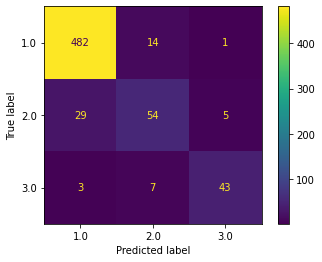

In [151]:
model_LogisticRegression_RFE_many_dimensions = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg'))
model_LogisticRegression_RFE_many_dimensions.fit(X_train_RFE_many_dimensions, y_train_RFE_many_dimensions)

y_pred_LogisticRegression_RFE_many_dimensions = model_LogisticRegression_RFE_many_dimensions.predict(X_test_RFE_many_dimensions)

print(classification_report(y_test_RFE_many_dimensions, y_pred_LogisticRegression_RFE_many_dimensions))
plot_confusion_matrix(model_LogisticRegression_RFE_many_dimensions, X_test_RFE_many_dimensions, y_test_RFE_many_dimensions)

**XGBoost**

Sem seleção de features

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.86      0.74      0.79        88
         3.0       0.94      0.89      0.91        53

    accuracy                           0.93       638
   macro avg       0.91      0.87      0.89       638
weighted avg       0.93      0.93      0.93       638



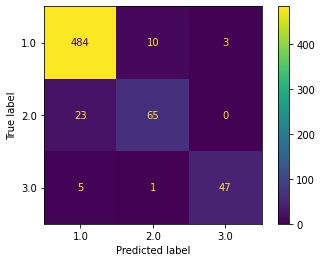

In [152]:
X_XGBClassifier_sem_selecao = norm_df.values
y_XGBClassifier_sem_selecao = df_fetal_health['fetal_health'].values

X_train_XGBClassifier_sem_selecao, X_test_XGBClassifier_sem_selecao, y_train_XGBClassifier_sem_selecao, y_test_XGBClassifier_sem_selecao = train_test_split(X_XGBClassifier_sem_selecao, y_XGBClassifier_sem_selecao, test_size=0.3, stratify=y_XGBClassifier_sem_selecao)

model_XGBClassifier_sem_selecao = OneVsRestClassifier(XGBClassifier())
model_XGBClassifier_sem_selecao.fit(X_train_XGBClassifier_sem_selecao, y_train_XGBClassifier_sem_selecao)

y_pred_XGBClassifier_sem_selecao = model_XGBClassifier_sem_selecao.predict(X_test_XGBClassifier_sem_selecao)

print(classification_report(y_test_XGBClassifier_sem_selecao, y_pred_XGBClassifier_sem_selecao))
plot_confusion_matrix(model_XGBClassifier_sem_selecao, X_test_XGBClassifier_sem_selecao, y_test_XGBClassifier_sem_selecao)

F_classif com poucas dimensões

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       497
         2.0       0.96      0.86      0.91        88
         3.0       0.92      0.91      0.91        53

    accuracy                           0.97       638
   macro avg       0.95      0.92      0.94       638
weighted avg       0.97      0.97      0.97       638



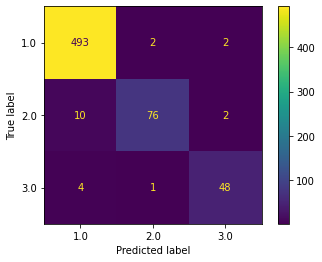

In [153]:
model_XGBClassifier_f_classif_few_dimensions = OneVsRestClassifier(XGBClassifier())
model_XGBClassifier_f_classif_few_dimensions.fit(X_train_f_classif_few_dimensions, y_train_f_classif_few_dimensions)

y_pred_XGBClassifier_f_classif_few_dimensions = model_XGBClassifier_f_classif_few_dimensions.predict(X_test_f_classif_few_dimensions)

print(classification_report(y_test_f_classif_few_dimensions, y_pred_XGBClassifier_f_classif_few_dimensions))
plot_confusion_matrix(model_XGBClassifier_f_classif_few_dimensions, X_test_f_classif_few_dimensions, y_test_f_classif_few_dimensions)

F_classif com muitas dimensões

              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       497
         2.0       0.82      0.83      0.82        88
         3.0       0.98      0.89      0.93        53

    accuracy                           0.94       638
   macro avg       0.92      0.90      0.91       638
weighted avg       0.94      0.94      0.94       638



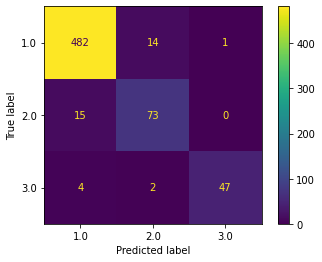

In [154]:
model_XGBClassifier_f_classif_many_dimensions = OneVsRestClassifier(XGBClassifier())
model_XGBClassifier_f_classif_many_dimensions.fit(X_train_f_classif_many_dimensions, y_train_f_classif_many_dimensions)

y_pred_XGBClassifier_f_classif_many_dimensions = model_XGBClassifier_f_classif_many_dimensions.predict(X_test_f_classif_many_dimensions)

print(classification_report(y_test_f_classif_many_dimensions, y_pred_XGBClassifier_f_classif_many_dimensions))
plot_confusion_matrix(model_XGBClassifier_f_classif_many_dimensions, X_test_f_classif_many_dimensions, y_test_f_classif_many_dimensions)

PCA

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       497
         2.0       0.87      0.81      0.84        88
         3.0       0.98      0.89      0.93        53

    accuracy                           0.95       638
   macro avg       0.93      0.89      0.91       638
weighted avg       0.95      0.95      0.95       638



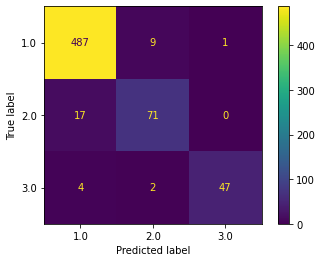

In [155]:
model_XGBClassifier_PCA = OneVsRestClassifier(XGBClassifier())
model_XGBClassifier_PCA.fit(X_train_PCA, y_train_PCA)

y_pred_XGBClassifier_PCA = model_XGBClassifier_PCA.predict(X_test_PCA)

print(classification_report(y_test_PCA, y_pred_XGBClassifier_PCA))
plot_confusion_matrix(model_XGBClassifier_PCA, X_test_PCA, y_test_PCA)

RFE com poucas dimensões

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       497
         2.0       0.89      0.83      0.86        88
         3.0       0.96      0.85      0.90        53

    accuracy                           0.95       638
   macro avg       0.94      0.89      0.91       638
weighted avg       0.95      0.95      0.95       638



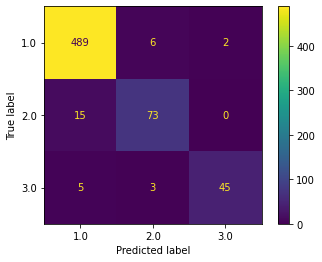

In [156]:
model_XGBClassifier_RFE_few_dimensions = OneVsRestClassifier(XGBClassifier())
model_XGBClassifier_RFE_few_dimensions.fit(X_train_RFE_few_dimensions, y_train_RFE_few_dimensions)

y_pred_XGBClassifier_RFE_few_dimensions = model_XGBClassifier_RFE_few_dimensions.predict(X_test_RFE_few_dimensions)

print(classification_report(y_test_RFE_few_dimensions, y_pred_XGBClassifier_RFE_few_dimensions))
plot_confusion_matrix(model_XGBClassifier_RFE_few_dimensions, X_test_RFE_few_dimensions, y_test_RFE_few_dimensions)

RFE com muitas dimensões

              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       497
         2.0       0.82      0.83      0.82        88
         3.0       0.98      0.89      0.93        53

    accuracy                           0.94       638
   macro avg       0.92      0.90      0.91       638
weighted avg       0.94      0.94      0.94       638



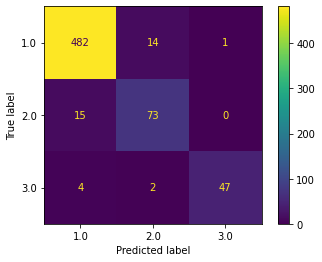

In [157]:
model_XGBClassifier_f_classif_many_dimensions = OneVsRestClassifier(XGBClassifier())
model_XGBClassifier_f_classif_many_dimensions.fit(X_train_f_classif_many_dimensions, y_train_f_classif_many_dimensions)

y_pred_XGBClassifier_f_classif_many_dimensions = model_XGBClassifier_f_classif_many_dimensions.predict(X_test_f_classif_many_dimensions)

print(classification_report(y_test_f_classif_many_dimensions, y_pred_XGBClassifier_f_classif_many_dimensions))
plot_confusion_matrix(model_XGBClassifier_f_classif_many_dimensions, X_test_f_classif_many_dimensions, y_test_f_classif_many_dimensions)

##Resultados